# <span style="color:Orange; font-family:Georgia;"> Predicting Insurance Charges: Exploratory Data Analysis (EDA) </span>


---

## Overview

This exploratory data analysis (EDA) aims to investigate factors influencing **insurance charges**. The analysis covers:

- **Univariate Analysis**: Studying individual variables.
- **Bivariate Analysis**: Analyzing relationships between pairs of variables.
- **Data Preprocessing**: Preparing data for modeling.
- **Visualization**: Employing Matplotlib and Plotly for interactive insights.

---

## Table of Contents

1. **Introduction**
2. **Dataset Overview**
3. **Univariate Analysis**
4. **Bivariate Analysis**
5. **Conclusions**

---

### 1. Introduction

The dataset contains information on **insurance charges**, with predictors such as:
- Demographics (age, sex, region)
- Health indicators (BMI, smoker status)
- Family details (number of children)

This analysis will explore trends and relationships that impact **charges**.

---

### 2. Dataset Overview

**Key Variables**:
- `age`: Age of the individual.
- `sex`: Gender (`male` or `female`).
- `bmi`: Body Mass Index, an indicator of health.
- `children`: Number of children covered by insurance.
- `smoker`: Smoking status (`yes` or `no`).
- `region`: Residential area.
- `charges`: Yearly medical insurance costs (target variable).

---

### 3. Univariate Analysis

This section focuses on individual variables to identify:
- Distributions
- Outliers
- Central tendencies

#### Example:
- **Age Distribution**:
    - Median age: 39 years.
    - Outliers detected in age groups above 60.

#### Visualizations:
- Histograms and box plots (Matplotlib/Plotly).

---

### 4. Bivariate Analysis

Examining relationships between variables, such as:
- Correlation between `bmi` and `charges`.
- Impact of smoking on insurance costs.

#### Visualizations:
- Scatterplots (charges vs. BMI).
- Boxplots (charges by smoker status).

---

### 5. Conclusions

The findings from this EDA will inform modeling strategies to predict insurance charges effectively. Insights on the influence of health and demographic factors will guide feature selection and preprocessing.

---




 

## <span id="load-id"> <span style='color: Orange'> <span style='font-family:Georgia'> 2. Dataset Overview

In [38]:
#Importing the libraries
    #manipulation de données
import pandas as pd 
import numpy as np 
    #Création des visuels
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots
#Data analysis 

from scipy.stats import pearsonr, chi2_contingency,ttest_ind, f_oneway,ttest_ind
from statsmodels.stats.weightstats import DescrStatsW




In [39]:
#Importing the dataset containg the insurance information and visualizing said dataset


#Load pickle 

df=pd.read_pickle('exp_data.pkl')

print("Our dataset  is ready for the exploratory analysis! It now has {} number of rows and {} number of columns \n\n Small preview of of the data: \n\n{}".format(df.shape[0],df.shape[1],df.head(2)))


Our dataset  is ready for the exploratory analysis! It now has 1337 number of rows and 7 number of columns 

 Small preview of of the data: 

   age     sex    bmi  children smoker     region     charges
0   19  female  27.90         0    yes  southwest  16884.9240
1   18    male  33.77         1     no  southeast   1725.5523


## <span style='color: Orange'> <span style='font-family:Georgia'> 3. Univariate Analysis

### <span style='color: White'> <span style='font-family:Georgia'>  The Analysis of Quantitative Variables 

  

In [40]:
# Constructing my numerical variables subset and using .describe() to get a general statistics analysis of my data 
numerical_vars = ['age', 'bmi', 'children', 'charges']
print(df[numerical_vars].describe())

               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.717450
max      64.000000    53.130000     5.000000  63770.428010


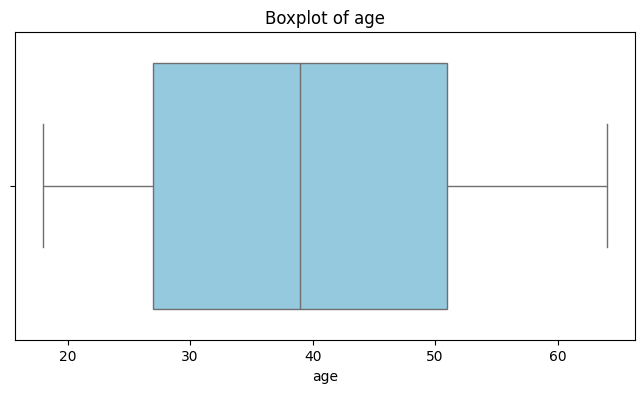

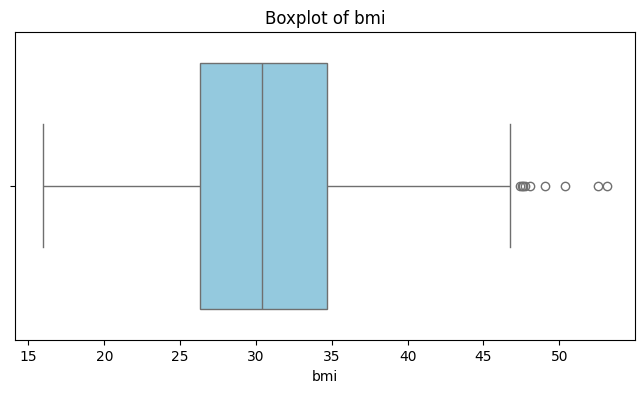

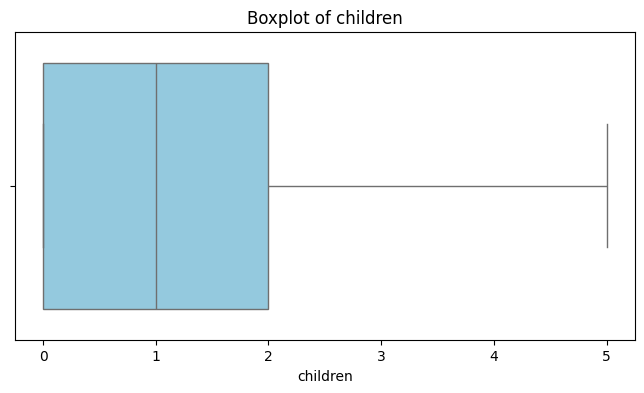

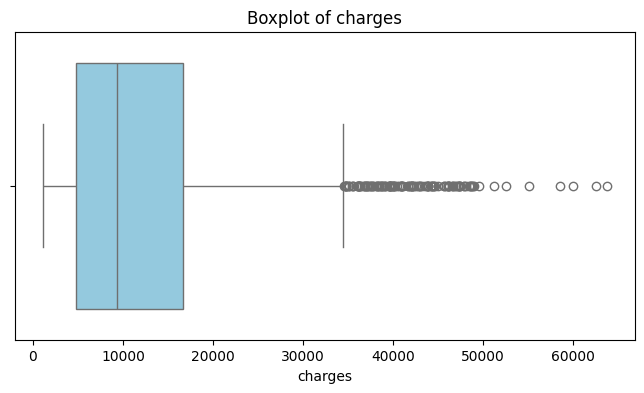

In [41]:
# Boxplots for each quantitative variable to detect possible outliers or extreme values 

for var in numerical_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=var, color='skyblue')
    plt.title(f'Boxplot of {var}')
    plt.xlabel(var)
    plt.show()

### <span style='color: White; font-family: Georgia;'> Analysis of Categorical Variables

In this phase of our study, we will examine the **frequency distributions** of the categorical variables by counting the occurrences of each modality in our explanatory categorical variables.

To enhance the presentation, we will use **Plotly** for visualization, allowing us to create dynamic and interactive graphics for a more engaging analysis experience.


In [42]:
# Creating pivot tables for each categorical column with count and percentage
categorical_columns = ['sex', 'smoker', 'region']

for col in categorical_columns: 
    value_counts = df[col].value_counts(sort=True)
    percentages = (value_counts / len(df) * 100).round(2)  # Calculate percentage and round to 2 decimals
    
    # Combine counts and percentages 
    result = pd.DataFrame({
        'Count': value_counts,
        'Percentage (%)': percentages
    })
    
    print(f"Distribution for {col}:\n\n{result}\n")
 

Distribution for sex:

        Count  Percentage (%)
sex                          
male      675           50.49
female    662           49.51

Distribution for smoker:

        Count  Percentage (%)
smoker                       
no       1063           79.51
yes       274           20.49

Distribution for region:

           Count  Percentage (%)
region                          
southeast    364           27.23
southwest    325           24.31
northwest    324           24.23
northeast    324           24.23



In [43]:
# Distribution of my categorical variables, visual presentation

for var in categorical_columns:
    # Frequency distribution
    freq_table = df[var].value_counts().reset_index()
    freq_table.columns = [var, 'Count']
    
    # Plotly Bar Chart
    fig = px.bar(freq_table, x=var, y='Count', title=f'Distribution of {var}', text='Count')
    fig.update_traces(texttemplate='%{text}', textposition='inside')
    fig.update_layout(
        showlegend=False,
        width=600,  
        height=400  
    )
    fig.show()


## <span style='color: Orange; font-family: Georgia;'> 4. Bivariate Analysis

#### <span style='color: White; font-family: Georgia;'> The Quantitative Variables

#### <span style='color: gray; font-family: Georgia;'> Pearson Correlation Coefficient

The **Pearson Correlation Coefficient**, often denoted as **r**, measures the strength and direction of the linear relationship between two variables. It provides valuable insights into the correlation:

- **Strength:** The closer |r| is to 1, the stronger the linear relationship.
- **Direction:**
  - **Positive r (0 < r ≤ 1):** As one variable increases, the other also increases.
  - **Negative r (-1 ≤ r < 0):** As one variable increases, the other decreases.
  - **r = 0:** No linear relationship exists between the variables.

**Formula:**

![Pearson Correlation Formula](https://miro.medium.com/v2/resize:fit:718/0*HRKVyt3FaMB2o9H1.png)

#### **Key Points:**
- **Range:** \( -1 \leq r \leq 1 \)
- The Pearson Correlation only captures **linear** relationships and assumes that both variables are continuous and normally distributed.



In [44]:
#Creating a table where we can properly interpret the correlation analysis for our quantitative variables



# Creating an empty DataFrame to store correlation coefficients, p-values, and interpretations
correlation_results = []

# Calculating the correlation matrix, p-values, and interpretation
for var1 in numerical_vars:
    for var2 in numerical_vars:
        if var1 != var2:  # Skip the diagonal
            corr, p_value = pearsonr(df[var1], df[var2])
            
            # Interpretation based on correlation coefficient
            if abs(corr) > 0.7:
                strength = 'Strong'
            elif abs(corr) >= 0.3:
                strength = 'Moderate'
            else:
                strength = 'Weak'
            
            # Interpretation based on p-value
            if p_value < 0.05:
                significance = 'Significant'
            else:
                significance = 'Not significant'
            
            # Add results to the DataFrame
            correlation_results.append([var1, var2, corr, p_value, strength, significance])

# Convert results into a DataFrame
correlation_df = pd.DataFrame(correlation_results, columns=['Target', 'Independant Variables', 'Correlation Coefficient', 'P-value', 'Strenght', 'Significance'])

# Filter for comparisons with 'charges'
charges_comparison = correlation_df[correlation_df['Target'] == 'charges'].sort_values(by='Correlation Coefficient', ascending=False)

#Displaying the result 
charges_comparison


,Target,Independant Variables,Correlation Coefficient,P-value,Strenght,Significance
9,charges,age,0.298308,6.975749e-29,Weak,Significant
10,charges,bmi,0.198401,2.468040e-13,Weak,Significant
11,charges,children,0.067389,1.371703e-02,Weak,Significant


<Figure size 600x300 with 0 Axes>

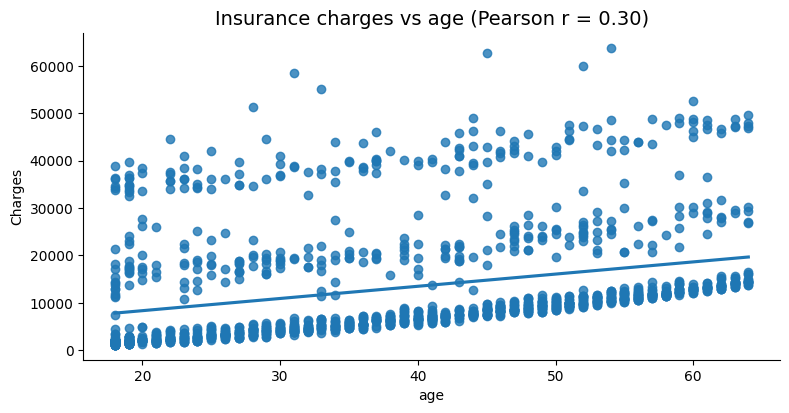

<Figure size 600x300 with 0 Axes>

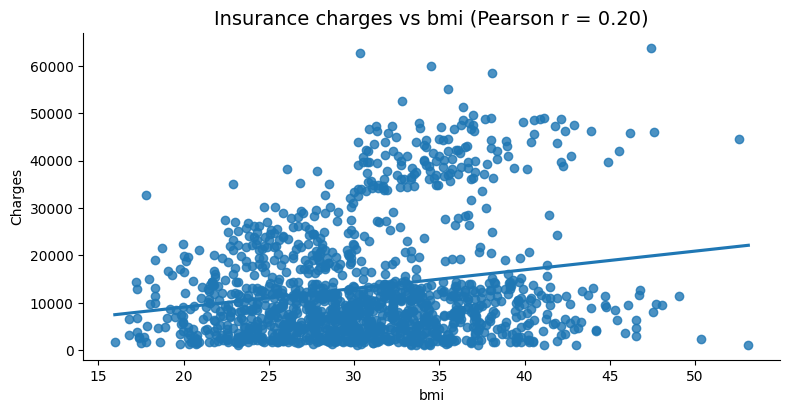

<Figure size 600x300 with 0 Axes>

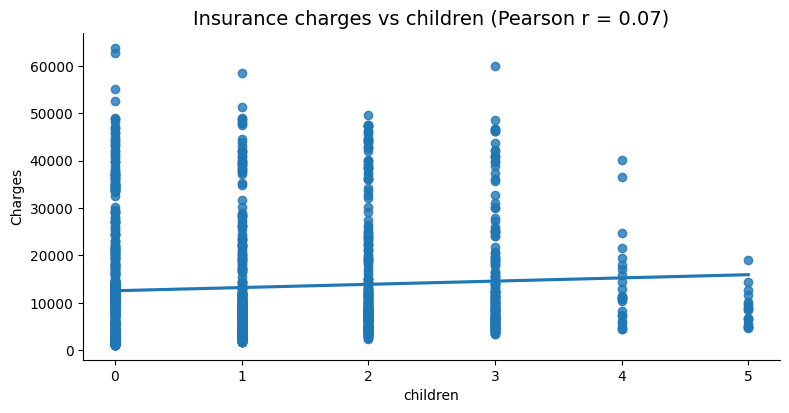

In [45]:
#Scatterplot and correlation plots
for var in numerical_vars:
    if var != "charges":
        # Calculate Pearson correlation coefficient
        corr, _ = pearsonr(df[var], df['charges'])
        
        # Create the scatter plot with regression line
        plt.figure(figsize=(6, 3))
        sns.lmplot(x=var, y='charges', data=df, ci=None, aspect=2, height=4)
        
        # Add title with Pearson correlation coefficient
        plt.title(f"Insurance charges vs {var} (Pearson r = {corr:.2f})", fontsize=14)
        plt.xlabel(var, fontsize=10)
        plt.ylabel('Charges', fontsize=10)
        
        plt.show()

#### <span style='color: White'> <span style='font-family:Georgia'>  Associations among Categorical Variables

To mitigate the risk of **multicollinearity**, it is crucial to evaluate whether our explanatory variables are strongly correlated.

We will use the **Chi-squared test** to assess the independence of our variables and determine if they are associated.

### Hypotheses  
- **H₀**: The variables are independent (\(p >= 0.05\))  
- **H₁**: The variables are associated (\(p < 0.05\))  

To further quantify the strength of the association, we will use **Cramér's V coefficient**, which measures the degree of association between categorical variables:

| **Cramér's V Value**  | **Strength of Association** |
|-----------------------|-----------------------------|
| \(0 <= V < 0.1\)      | Very weak                   |
| \(0.1 <= V < 0.3\)    | Weak                        |
| \(0.3 <= V < 0.5\)    | Moderate                    |
| \(V >= 0.5\)          | Strong                      |


In [46]:
#Creating contingency tables for analysis 
for i, col1 in enumerate(categorical_columns):
    for j, col2 in enumerate(categorical_columns):
        if i < j:  # Ensuring each pair is processed only once
            # Creating  the contingency table
            contingency_table = pd.crosstab(df[col1], df[col2])
            #Depending on the analysis (we can normalize by total count/row or column, we decided to go by row)
            # Calculate percentages (normalize by total count)
            #contingency_table_percentage = contingency_table / contingency_table.sum().sum() * 100  # Total normalization
            contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100  # Row-wise normalization
            # contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100  # Column-wise normalization

            # Combine counts and percentages into a single table
            combined_table = contingency_table.astype(str) + " (" + contingency_table_percentage.round(2).astype(str) + "%)"

            # Printing our combined table 
            print(f"Contingency Table: {col1} vs {col2}")
            print(combined_table)
            print("-" * 40)  # Adding a line to separate our tables


Contingency Table: sex vs smoker
smoker            no           yes
sex                               
female  547 (82.63%)  115 (17.37%)
male    516 (76.44%)  159 (23.56%)
----------------------------------------
Contingency Table: sex vs region
region     northeast     northwest     southeast     southwest
sex                                                           
female  161 (24.32%)  164 (24.77%)  175 (26.44%)  162 (24.47%)
male    163 (24.15%)   160 (23.7%)   189 (28.0%)  163 (24.15%)
----------------------------------------
Contingency Table: smoker vs region
region     northeast     northwest     southeast     southwest
smoker                                                        
no      257 (24.18%)  266 (25.02%)  273 (25.68%)  267 (25.12%)
yes      67 (24.45%)   58 (21.17%)   91 (33.21%)   58 (21.17%)
----------------------------------------


In [47]:
# Following the exemple of our pearson data frame sumarized statistics, we'll do the same for our categorical variables
results=[]
for var1 in categorical_columns:
    for var2 in categorical_columns:
        if var1 != var2:  #this is to avoid doing the test for the variable itself 
            # Cross Tabulation
            contingency_table = pd.crosstab(df[var1], df[var2])
            
            # Chi-Square Test
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            
            # Compute Cramér's V
            n = contingency_table.sum().sum()  # Total observations
            k, r = contingency_table.shape
            cramers_v = np.sqrt(chi2 / (n * (min(k - 1, r - 1))))
            
            # Interpretation of Cramér's V
            if cramers_v < 0.1:
                strength = 'Very weak'
            elif cramers_v < 0.3:
                strength = 'Weak'
            elif cramers_v < 0.5:
                strength = 'Moderate'
            else:
                strength = 'Strong'
            
            # Interpretation of Chi-Square significance
            significance = 'Significant' if p < 0.05 else 'Not significant'
            
            # Add results to the list
            #results.append([var1, var2, chi2, p, dof, cramers_v, strength, significance])
            results.append([var1, var2, chi2, dof, p, significance, cramers_v, strength])

# Create a DataFrame for the results
chi2_df = pd.DataFrame(results, columns=[
    'Variable 1', 'Variable 2', 'Chi2',  'Degrees of Freedom', 'P-value', 'Significance',
    'Cramér\'s V', "Force d'asociation"
])

#Display the results
chi2_df

,Variable 1,Variable 2,Chi2,Degrees of Freedom,P-value,Significance,Cramér's V,Force d'asociation
0,sex,smoker,7.469139,1,0.006277,Significant,0.074743,Very weak
1,sex,region,0.476910,3,0.923934,Not significant,0.018887,Very weak
2,smoker,sex,7.469139,1,0.006277,Significant,0.074743,Very weak
3,smoker,region,7.277903,3,0.063548,Not significant,0.073780,Very weak
4,region,sex,0.476910,3,0.923934,Not significant,0.018887,Very weak
5,region,smoker,7.277903,3,0.063548,Not significant,0.073780,Very weak


#### <span style='color: Gray'> <span style='font-family:Georgia'>  Explainatory variables (categorial) vs Explainatory variables (Numerical)

In [48]:
#Creating pivot tables for my explainatory variables. 

categorical_columns = ['sex', 'smoker', 'region']

for col in categorical_columns: 
    pivot_table = df.pivot_table( values=numerical_vars,index=col,aggfunc='mean')
    print(f"Pivot table for {col}:\n {df[col].value_counts(sort=True)}\n\n", pivot_table)
    print("\n") 

Pivot table for sex:
 sex
male      675
female    662
Name: count, dtype: int64

               age        bmi       charges  children
sex                                                 
female  39.503021  30.377749  12569.578844  1.074018
male    38.946667  30.943652  13974.998864  1.117037


Pivot table for smoker:
 smoker
no     1063
yes     274
Name: count, dtype: int64

               age        bmi       charges  children
smoker                                              
no      39.404516  30.651853   8440.660307  1.091251
yes     38.514599  30.708449  32050.231832  1.113139


Pivot table for region:
 region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

                  age        bmi       charges  children
region                                                 
northeast  39.268519  29.173503  13406.384516  1.046296
northwest  39.259259  29.195494  12450.840844  1.151235
southeast  38.939560  33.355989  14735.411438  1.04945

### <span style='color: Gray'> <span style='font-family:Georgia'>  Target vs Explainatory variables


We are going to start by analyzing our target variable(quantitative) vs our categorical variables. 

For this analysis, we want to compare means or distributions.

If the variable has two categories:  
   - **T-test (Student's t-test)**  
     - H0: The means are equal (p >= 0.05)  
     - H1: The means are different (p < 0.05)  

To measure the magnitude of the difference, we use Cohen's d for effect size.
To measure the magnitude of the difference, we use Cohen's d for effect size.

For this analysis, we want to compare means or distributions.

If the variable has two categories:  
   - **T-test (Student's t-test)**  
     - H0: The means are equal (p >= 0.05)  
     - H1: The means are different (p < 0.05)  

To measure the magnitude of the difference, we use Cohen's d for effect size.
### Cohen's d Interpretation:
| **Effect Size**   | **Strength of Association** |
|--------------------|-----------------------------|
| < 0.2             | Very small                 |
| 0.2 - 0.5         | Small                      |
| 0.5 - 0.8         | Medium                     |
| > 0.8             | Large                      |

If the variable has more than two categories:  
   - **ANOVA Test**  
     - H0: The means are equal (p >= 0.05)  
     - H1: At least one mean is different (p < 0.05)  

To measure the magnitude of the difference, we use η² (eta squared).

### η² Interpretation:
| **Effect Size**   | **Strength of Association** |
|--------------------|-----------------------------|
| < 0.01            | Very small                 |
| 0.01 - 0.06       | Small                      |
| 0.06 - 0.14       | Medium                     |
| > 0.14            | Large                      |

In [49]:
# Create a new dataframe for the results
results = []

# Perform ANOVA or t-test and calculate effect sizes
for var in categorical_columns:
    if len(df[var].unique()) > 2:
        # ANOVA for variables with more than 2 categories
        groups = [df[df[var] == cat]['charges'] for cat in df[var].unique()]
        f_stat, p_value = f_oneway(*groups)
        
        # Calculate eta squared for effect size (ANOVA)
        mean_sq_between = sum([(group.mean() - df['charges'].mean())**2 * len(group) for group in groups]) / (len(groups) - 1)
        mean_sq_within = sum([((group - group.mean())**2).sum() for group in groups]) / (len(df) - len(groups))
        eta_squared = mean_sq_between / (mean_sq_between + mean_sq_within)
        
        # Interpretation of p-value and effect size
        p_interpretation = 'Significant' if p_value < 0.05 else 'Not Significant'
        if eta_squared < 0.01:
            eta_interpretation = 'Negligible Effect'
        elif eta_squared < 0.06:
            eta_interpretation = 'Moderate Effect'
        else:
            eta_interpretation = 'Strong Effect'
        
        results.append([var, 'ANOVA', p_value, p_interpretation, eta_squared, eta_interpretation])

    else:
        # t-test for variables with 2 categories
        group1 = df[df[var] == df[var].unique()[0]]['charges']
        group2 = df[df[var] == df[var].unique()[1]]['charges']
        t_stat, p_value = ttest_ind(group1, group2)
        
        # Calculate Cohen's d for effect size (t-test)
        pooled_std = ((len(group1) - 1) * group1.std(ddof=1) ** 2 + (len(group2) - 1) * group2.std(ddof=1) ** 2) / (len(group1) + len(group2) - 2)
        pooled_std = pooled_std ** 0.5
        d = (group1.mean() - group2.mean()) / pooled_std
        
        # Interpretation of p-value and effect size
        p_interpretation = 'Significant' if p_value < 0.05 else 'Not Significant'
        if abs(d) < 0.2:
            d_interpretation = 'Negligible Effect'
        elif abs(d) < 0.5:
            d_interpretation = 'Moderate Effect'
        else:
            d_interpretation = 'Strong Effect'
        
        results.append([var, 't-test', p_value, p_interpretation, d, d_interpretation])

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results, columns=['Variable', 'Test', 'p-value', 'p-value Interpretation', 'Effect Size', 'Effect Size Interpretation'])

# Display the results
results_df


,Variable,Test,p-value,p-value Interpretation,Effect Size,Effect Size Interpretation
0,sex,t-test,3.382079e-02,Significant,-0.116204,Negligible Effect
1,smoker,t-test,1.406722e-282,Significant,3.160290,Strong Effect
2,region,ANOVA,3.276288e-02,Significant,0.745297,Strong Effect


### <span style='color: white; font-family: Georgia;'> Creation of New Categorical Variables

To further investigate the impact of **age** and **BMI** on our target variable, we transformed these continuous variables into categorical ones. Additionally, we created **dummy variables** for all categorical variables to facilitate the creation of a correlation matrix.

#### **Age Categories:**
- **<25**: Younger than 25 years
- **25-55**: Between 25 and 55 years
- **55+**: Older than 55 years

#### **BMI Categories:**
- **Underweight**: BMI < 18.5
- **Regular Weight**: 18.5 ≤ BMI < 24.9
- **Overweight**: 25 ≤ BMI < 29.9
- **Obese**: BMI ≥ 30


In [50]:
#Creaty a copy of my df dataset

df_category= df.copy()

# Puting my numerical variables in categories 
bin_edges = [0, 25, 55, float('inf')]  # Float('inf') for ages 55+
bin_labels = ['<25', '25-55', '55+']


bmi_bin_edges = [0, 18.5, 24.29, 29.9 ,float('inf')] 
bmi_bin_labels = ['<Under_weight','Regular_weight','Over_weight','Obese']

# Create the age binned column
df_category['age_category'] = pd.cut(df_category['age'], bins=bin_edges, labels=bin_labels, right=False)

# Create the bmi binned column
df_category['bmi_category'] = pd.cut(df_category['bmi'], bins=bmi_bin_edges, labels=bmi_bin_labels, right=False)


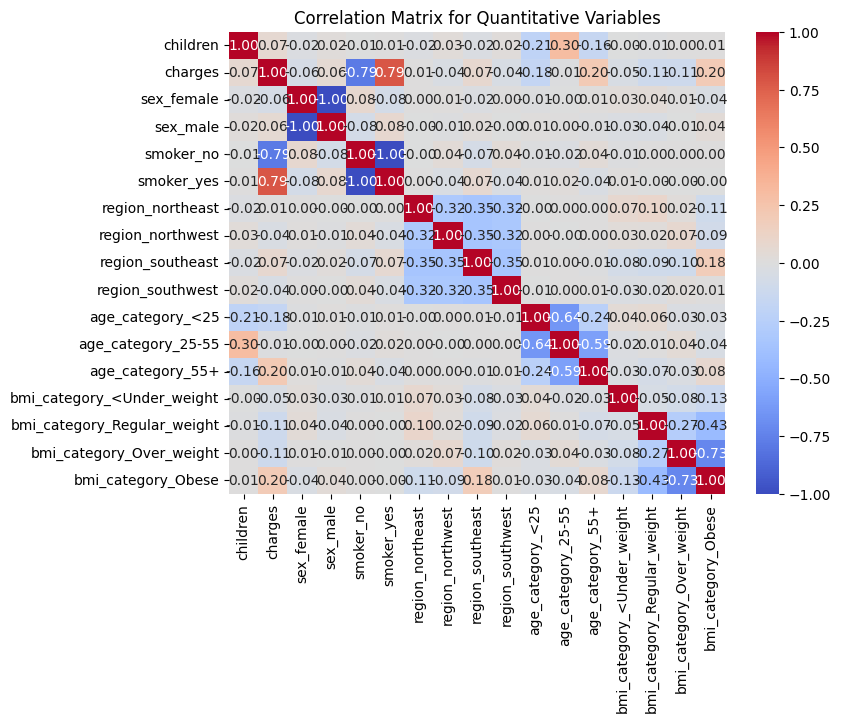

In [51]:
#Correlation among all the variables 
df_category.drop(['age','bmi'],axis=1,inplace=True)

new_categorical_columns=categorical_columns.append(['age_category','bmi_category'])
df_dummies = pd.get_dummies(df_category, columns=new_categorical_columns, drop_first=False)

# Compute correlation matrix for all my variables
corr_matrix = df_dummies.corr()


# Plot the correlation matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix for Quantitative Variables")
plt.show()


In [52]:
# Creating an empty DataFrame to store correlation coefficients, p-values, and interpretations

#Transforming our booleans columns from the df_dumies 
bool_columns = df_dummies.select_dtypes(include='bool').columns
df_dummies[bool_columns] = df_dummies[bool_columns].astype(int)


correlation_results = []

# Calculating the correlation matrix, p-values, and interpretation
for var1 in df_dummies.columns:
    for var2 in df_dummies.columns:
        if var1 != var2:  # Skip the diagonal
            corr, p_value = pearsonr(df_dummies[var1], df_dummies[var2])
            
            # Interpretation based on correlation coefficient
            if abs(corr) > 0.7:
                strength = 'Strong'
            elif abs(corr) >= 0.3:
                strength = 'Moderate'
            else:
                strength = 'Weak'
            
            # Interpretation based on p-value
            if p_value < 0.05:
                significance = 'Significant'
            else:
                significance = 'Not significant'
            
            # Add results to the DataFrame
            correlation_results.append([var1, var2, corr, p_value, strength, significance])

# Convert results into a DataFrame
correlation_df = pd.DataFrame(correlation_results, columns=['Target', 'Independant Variables', 'Correlation Coefficient', 'P-value', 'Strenght', 'Significance'])

# Filter for comparisons with 'charges'
charges_comparison = correlation_df[correlation_df['Target'] == 'charges'].sort_values(by='Correlation Coefficient', ascending=False)

#Displaying the result 
charges_comparison


,Target,Independant Variables,Correlation Coefficient,P-value,Strenght,Significance
20,charges,smoker_yes,0.787234,1.406722e-282,Strong,Significant
27,charges,age_category_55+,0.203260,6.202791e-14,Weak,Significant
31,charges,bmi_category_Obese,0.195780,5.122882e-13,Weak,Significant
23,charges,region_southeast,0.073578,7.112934e-03,Weak,Significant
16,charges,children,0.067389,1.371703e-02,Weak,Significant
18,charges,sex_male,0.058044,3.382079e-02,Weak,Significant
21,charges,region_northeast,0.005945,8.280607e-01,Weak,Not significant
26,charges,age_category_25-55,-0.011646,6.705046e-01,Weak,Not significant
22,charges,region_northwest,-0.038695,1.573396e-01,Weak,Not significant
24,charges,region_southwest,-0.043637,1.107417e-01,Weak,Not significant


### <span style='color: white; font-family: Georgia;'> Target vs Explanatory Variables (Graphical Analysis)
------------
In this section, we explore the relationship between the **target variable** (insurance price) and the **explanatory variables** through visualizations. We will display the **average insurance price** per category to help identify trends and insights.

Additionally, we will include **scatterplots** showing the relationship between the **target variable** and quantitative variables. These plots will help us visualize how **smoker status**, which has the highest Pearson correlation coefficient impacts these relationships.

For the modeling phase, we will **stratify by smoker status**, ensuring that the effect of smoking on insurance prices is properly captured and analyzed across different groups.


In [53]:


new_categorical_columns= ['sex','region','smoker','age_category','bmi_category']

# Create an empty list to hold all plot types for each category
figures = []

# Loop over categorical variables to create plots
for var in new_categorical_columns:
    # Create a subplot for each category
    fig = make_subplots(rows=1, cols=1)
    
    # Bar plot for the mean of charges by the categorical variable
    mean_values = df_category.groupby(var)['charges'].mean()
    bar = go.Bar(
        x=mean_values.index,
        y=mean_values,
        name=f"Bar {var}",
        visible=True  # Default visibility is true for the bar plot
    )
    
    # Add mean annotations (tags) on the bars
    bar_annotations = [
        go.layout.Annotation(
            x=x_pos,
            y=y_pos,
            text=f'{y_pos:.2f}',
            font=dict(size=12, color='black'),
            showarrow=False,
            bgcolor='white',
            borderpad=2,
            xanchor='center',
            yanchor='bottom'
        )
        for x_pos, y_pos in zip(mean_values.index, mean_values)
    ]
    
    # Box plot for the distribution of charges by the categorical variable
    box = go.Box(
        x=df_category[var],
        y=df_category['charges'],
        name=f"Box {var}",
        visible=False  # Default visibility is false for box plot
    )

    # Violin plot for the distribution of charges by the categorical variable
    violin = go.Violin(
        x=df_category[var],
        y=df_category['charges'],
        name=f"Violin {var}",
        box_visible=True,
        visible=False  # Default visibility is false for violin plot
    )

    # Add all traces (bar, box, violin) and annotations to the figure
    fig.add_trace(bar)
    fig.add_trace(box)
    fig.add_trace(violin)
    fig.update_layout(annotations=bar_annotations)

    # Create buttons for switching between plot types
    buttons = [
        {
            'label': 'Bar',
            'method': 'update',
            'args': [
                {'visible': [True, False, False]},  # Show the bar plot, hide box and violin
                {'title': f'Average Insurance Price per {var} - Bar Plot'}
            ]
        },
        {
            'label': 'Box',
            'method': 'update',
            'args': [
                {'visible': [False, True, False]},  # Show the box plot, hide bar and violin
                {'title': f'Insurance Price Distribution per {var} - Box Plot'}
            ]
        },
        {
            'label': 'Violin',
            'method': 'update',
            'args': [
                {'visible': [False, False, True]},  # Show the violin plot, hide bar and box
                {'title': f'Insurance Price Distribution per {var} - Violin Plot'}
            ]
        }
    ]
    
    # Update the layout to include the buttons for switching between graphic types
    fig.update_layout(
        title=f'Choose Plot Type for {var}',
        updatemenus=[{
            'buttons': buttons,
            'direction': 'down',
            'showactive': True,
            'x': 1.1,  # Move buttons to the right
            'xanchor': 'left',
            'y': 0.5,  # Place buttons vertically in the middle
            'yanchor': 'middle'
        }],
        showlegend=True,
        height=600,
        width=800
    )
    
    # Add the figure to the list of figures
    figures.append(fig)

# Display all figures one by one
for fig in figures:
    fig.show()


C:\Users\elian\AppData\Local\Temp\ipykernel_15236\842008651.py:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [64]:
import plotly.io as pio

# Filepath for the combined HTML file
output_file = "combined_figures.html"

# Initialize HTML structure
html_content = """
<!DOCTYPE html>
<html>
<head>
    <title>Combined Plotly Figures</title>
    <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
</head>
<body>
<h1>Combined Plotly Figures</h1>
"""

# Loop through figures and append each one
for i, fig in enumerate(figures, start=1):
    if fig:
        html_content += f"<h2>Figure {i}</h2>"
        # Add the figure HTML, ensuring no duplicate <html> or <body> tags
        html_content += pio.to_html(fig, full_html=False, include_plotlyjs=False)

# Close HTML structure
html_content += """
</body>
</html>
"""

# Write the final HTML to a file
with open(output_file, "w", encoding="utf-8") as f:
    f.write(html_content)

print(f"Saved all figures in: {output_file}")


Saved all figures in: combined_figures.html


In [54]:
import os

# Directory to save HTML files
output_dir = "plotly_figures"
os.makedirs(output_dir, exist_ok=True)

# Save each figure
for i, fig in enumerate(figures):
    html_file = os.path.join(output_dir, f"figure_{i + 1}.html")
    fig.write_html(html_file)
    print(f"Saved: {html_file}")


Saved: plotly_figures\figure_1.html
Saved: plotly_figures\figure_2.html
Saved: plotly_figures\figure_3.html
Saved: plotly_figures\figure_4.html
Saved: plotly_figures\figure_5.html


In [35]:
#Seeing the correlation of the quantitatives variables by the status of smoker
import plotly.express as px
from scipy.stats import pearsonr

# Iterate over numerical variables excluding 'charges'
for var in numerical_vars: 
    if var != "charges":
        # Calculate Pearson correlation coefficient
        corr, _ = pearsonr(df[var], df['charges'])
        
        # Create scatter plot with regression line, coloring by 'smoker'
        fig = px.scatter(
            df,
            x=var,
            y='charges',
            color='smoker',
            trendline='ols',  # Adds regression line
            title=f"Insurance Charges vs {var} (Pearson r = {corr:.2f})",
            labels={var: var, 'charges': 'Charges'},
            template='plotly_white'
        )
        
        # Customize layout
        fig.update_layout(
            title_font_size=16,
            xaxis_title=var,
            yaxis_title='Charges',
            legend_title_text='Smoker Status',
            width=800,  
            height=500  
    )
        
        # Show the figure
        fig.show()


## <span style='color: Orange; font-family: Georgia;'> 5. Conclusions


#### **Distribution of Variables**
- **Charges**: The *charges* variable is **positively skewed**. This means that the distribution of charges is right-tailed, with most values clustered on the lower end, and a few individuals incurring significantly higher charges. The presence of high charges suggests that the majority of the individuals in the dataset have lower insurance premiums, while a small subset has very high charges, contributing to the skew.
  
- **Age**: The *age* variable appears **approximately normally distributed**, with a slight concentration around the middle age ranges. It does not show significant skewness, and the spread is relatively even across the age groups.

- **BMI**: The *BMI* variable is also **slightly right-skewed**, similar to *charges*. Most individuals in the dataset fall into the **overweight** or **normal weight** categories, with fewer individuals in the **underweight** or **obese** categories.

- **Number of Children**: The *children* variable shows a **skewed distribution**, with the majority of individuals having either **no children** or **one child**, while fewer individuals have larger families. This may affect the relationship between *children* and *charges*.

- **Smoker Status**: The **smoker** variable is **imbalanced**, with a significantly higher number of **non-smokers** than **smokers**, which is reflected in the distribution of insurance charges, as smokers tend to incur much higher charges.

- **Region**: The **region** variable is relatively evenly distributed across the four categories: **Southeast**, **Southwest**, **Northwest**, and **Northeast**. This balance ensures that region-related effects can be appropriately analyzed without any significant sampling bias in the regions.

- **Sex**: The **sex** variable is fairly balanced, with a near-even distribution of **male** and **female** participants in the dataset. This helps minimize any gender bias in the analysis.

---

#### **First Pearson Correlation Tests (Continuous Variables)**
- **Charges and Age**: There is a **weak positive correlation** between *charges* and **age** (0.298), which is statistically significant (**p = 6.98e-29**). As individuals age, their insurance charges tend to increase slightly.
  
- **Charges and BMI**: A **weak positive correlation** (0.198) was found between *charges* and **BMI**, also significant (**p = 2.47e-13**). Higher BMI values are associated with higher charges.

- **Charges and Children**: A **very weak positive correlation** (0.067) between *charges* and the number of children is observed, which is significant (**p = 0.0137**), though the effect is minimal.


---

#### **Chi-Squared Tests (Categorical Variables)**
- **Sex and Smoker Status**: A significant relationship was found (**Chi2 = 7.47, p = 0.0063**) with a **very weak association** (Cramér's V = 0.0747). There is a slight, but statistically significant difference in smoking rates between males and females.

- **Sex and Region**: No significant relationship (**Chi2 = 0.48, p = 0.924**), with a **very weak association** (Cramér's V = 0.0189), suggesting sex does not influence regional distribution.

- **Smoker Status and Region**: A **marginally non-significant** relationship (**Chi2 = 7.28, p = 0.064**) exists between *smoker status* and *region*, with a **very weak association** (Cramér's V = 0.0738). Although the relationship is weak, it hints at a slight variation across regions regarding smoking prevalence.

---

#### **ANOVA and t-Test Results (Categorical vs. Continuous Variables)**
- **Sex and Charges**: A **t-test** revealed a **negligible effect** (-0.1162, p = 0.0338) of *sex* on *charges*, suggesting that there is no significant financial difference between male and female participants.
  
- **Smoker Status and Charges**: A **t-test** showed a **strong effect** (3.1603, p = 1.41e-282) of *smoker status* on *charges*, with smokers having significantly higher charges than non-smokers.

- **Region and Charges**: An **ANOVA** test indicated a **strong effect** (F = 0.7453, p = 0.0328) of *region* on *charges*. The variation in charges across regions is significant, with the **Southeast** region having the highest average charges, while the **Southwest** region has the lowest.

---

#### **Last Pearson Correlation Test (Transformed Variables)**
- **Charges and Sex**: The **Pearson correlation** between *charges* and **sex** is **-0.0580**, with a **p-value of 0.0338**, indicating a **weak negative correlation**, but the effect is negligible.

- **Charges and Age Category**: The **Pearson correlation** between *charges* and **age category** is **-0.1791**, with a **p-value of 4.23e-11**, indicating a **weak negative correlation**, suggesting slightly lower charges for younger age groups.

- **Charges and BMI Categories**: 
  - **BMI Category Underweight**: A **negative correlation** of **-0.1193** (**p = 1.21e-05**), indicating that underweight individuals tend to have lower charges.
  - **BMI Category Regular Weight**: A **negative correlation** of **-0.1274** (**p = 2.96e-06**), indicating a slightly negative relationship with charges.
  - **BMI Category Overweight**: A **negative correlation** of **-0.1056** (**p = 1.09e-04**), suggesting that overweight individuals tend to have lower charges as well.

- **Charges and Smoker Status**: The **Pearson correlation** between *charges* and **smoker status** is **0.7872**, with a **p-value of 1.41e-282**, indicating a **strong positive correlation**. Smokers tend to have significantly higher charges compared to non-smokers.
---

### **Key Insights**
- **Smoker status** strongly influences insurance charges, with smokers paying significantly higher premiums than non-smokers.
- **Region** also plays a role in determining charges, with regional differences in average premiums.
- The **age** and **BMI** of individuals have a weak but statistically significant correlation with insurance charges, suggesting a slight influence on pricing.
- The **sex** variable has a **negligible effect** on insurance charges.
- The relationships among categorical variables like **sex**, **smoker status**, and **region** are either weak or negligible, with the most notable finding being the influence of **smoker status** on charges.

